In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('COPD_100k_dataset.csv')
print(f"Dataset shape: {df.shape}")

Dataset shape: (100000, 13)


In [3]:
df.head()

,Age,BMI,Smoking_Pack_Years,FEV1_FVC_Ratio,FEV1_Percent_Predicted,Oxygen_Saturation_SpO2,mMRC_Scale,Exacerbations_History,Occupational_Exposure,Eosinophil_Count,DLCO_Level,AAT_Level,COPD_Diagnosis
0,45,28.1,15.9,0.674,69,92.9,4,3,1,376,47.8,83,1
1,42,20.3,9.7,0.675,80,98.6,3,3,0,419,64.0,209,1
2,69,23.0,10.4,0.832,89,98.5,2,5,1,512,50.9,168,0
3,74,23.3,7.3,0.768,80,90.8,3,4,0,331,84.4,136,1
4,62,27.2,13.8,0.671,67,89.9,0,0,0,662,57.0,101,1


In [5]:
df.tail()

,Age,BMI,Smoking_Pack_Years,FEV1_FVC_Ratio,FEV1_Percent_Predicted,Oxygen_Saturation_SpO2,mMRC_Scale,Exacerbations_History,Occupational_Exposure,Eosinophil_Count,DLCO_Level,AAT_Level,COPD_Diagnosis
99995,56,17.9,21.5,0.598,67,100.0,1,4,1,308,80.6,139,1
99996,53,21.7,1.1,0.664,96,100.0,1,1,0,740,81.5,121,0
99997,79,23.2,51.7,0.608,97,91.4,0,2,0,442,94.6,219,1
99998,58,15.9,17.0,0.950,104,94.3,4,3,0,596,67.5,107,0
99999,79,27.2,14.6,0.709,78,87.7,3,0,1,559,65.1,126,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     100000 non-null  int64  
 1   BMI                     100000 non-null  float64
 2   Smoking_Pack_Years      100000 non-null  float64
 3   FEV1_FVC_Ratio          100000 non-null  float64
 4   FEV1_Percent_Predicted  100000 non-null  int64  
 5   Oxygen_Saturation_SpO2  100000 non-null  float64
 6   mMRC_Scale              100000 non-null  int64  
 7   Exacerbations_History   100000 non-null  int64  
 8   Occupational_Exposure   100000 non-null  int64  
 9   Eosinophil_Count        100000 non-null  int64  
 10  DLCO_Level              100000 non-null  float64
 11  AAT_Level               100000 non-null  int64  
 12  COPD_Diagnosis          100000 non-null  int64  
dtypes: float64(5), int64(8)
memory usage: 9.9 MB


In [7]:
df.describe()

,Age,BMI,Smoking_Pack_Years,FEV1_FVC_Ratio,FEV1_Percent_Predicted,Oxygen_Saturation_SpO2,mMRC_Scale,Exacerbations_History,Occupational_Exposure,Eosinophil_Count,DLCO_Level,AAT_Level,COPD_Diagnosis
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,62.07936,24.004575,24.470192,0.699501,66.994940,93.878831,2.006180,2.512410,0.299720,422.519180,69.888837,165.463040,0.820500
std,12.92520,3.947435,22.958166,0.118118,24.460708,3.763996,1.423693,1.718836,0.458138,217.017186,14.719357,49.059243,0.383772
min,40.00000,15.000000,0.000000,0.350000,25.000000,82.000000,0.000000,0.000000,0.000000,50.000000,20.000000,80.000000,0.000000
25%,51.00000,21.300000,7.200000,0.617000,46.000000,91.300000,1.000000,1.000000,0.000000,234.000000,59.900000,124.000000,1.000000
50%,62.00000,24.000000,17.200000,0.699000,67.000000,94.000000,2.000000,3.000000,0.000000,421.000000,69.900000,165.000000,1.000000
75%,73.00000,26.700000,34.400000,0.782000,88.000000,96.700000,3.000000,4.000000,1.000000,611.000000,80.200000,209.000000,1.000000
max,84.00000,35.000000,100.000000,0.950000,109.000000,100.000000,4.000000,5.000000,1.000000,799.000000,100.000000,249.000000,1.000000


In [8]:
df.isnull().sum()

Age                       0
BMI                       0
Smoking_Pack_Years        0
FEV1_FVC_Ratio            0
FEV1_Percent_Predicted    0
Oxygen_Saturation_SpO2    0
mMRC_Scale                0
Exacerbations_History     0
Occupational_Exposure     0
Eosinophil_Count          0
DLCO_Level                0
AAT_Level                 0
COPD_Diagnosis            0
dtype: int64

In [9]:
df['COPD_Diagnosis'].value_counts()

COPD_Diagnosis
1    82050
0    17950
Name: count, dtype: int64

In [10]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_limit, upper=upper_limit)
    return df
    
cols_to_fix = ['BMI', 'Smoking_Pack_Years', 'FEV1_FVC_Ratio', 'Oxygen_Saturation_SpO2', 'DLCO_Level']
for col in cols_to_fix:
    df = handle_outliers(df, col)
print("\n" + "="*80 + "\n")

This is the parts of Feature Engineering : 

In [11]:
df['FEV1_FVC_Calculated'] = df['FEV1_Percent_Predicted'] / 100
df['Occupational_Exposure'] = df['Occupational_Exposure'].astype(int)

In [12]:
df['Age_Category'] = pd.cut(df['Age'], bins=[40, 50, 60, 70, 85], labels=['40-50', '50-60', '60-70', '70+'])
df['BMI_Category'] = pd.cut(df['BMI'], bins=[15, 18.5, 25, 30, 35], labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
print("Created Age_Category and BMI_Category features")
print("\n" + "="*80 + "\n")

Created Age_Category and BMI_Category features




Exploratory Data Analysis 

In [13]:
sns.set_style("whitegrid")

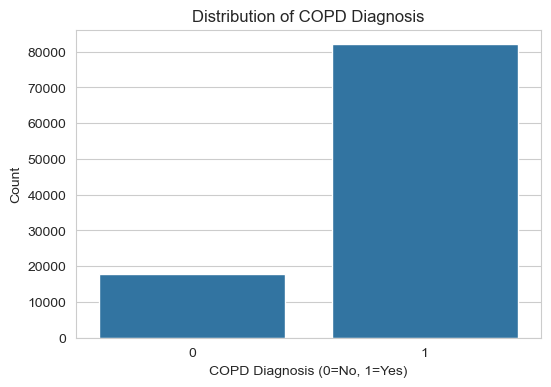

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['COPD_Diagnosis'])
plt.title("Distribution of COPD Diagnosis")
plt.xlabel("COPD Diagnosis (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()
print("\n" + "="*80 + "\n")

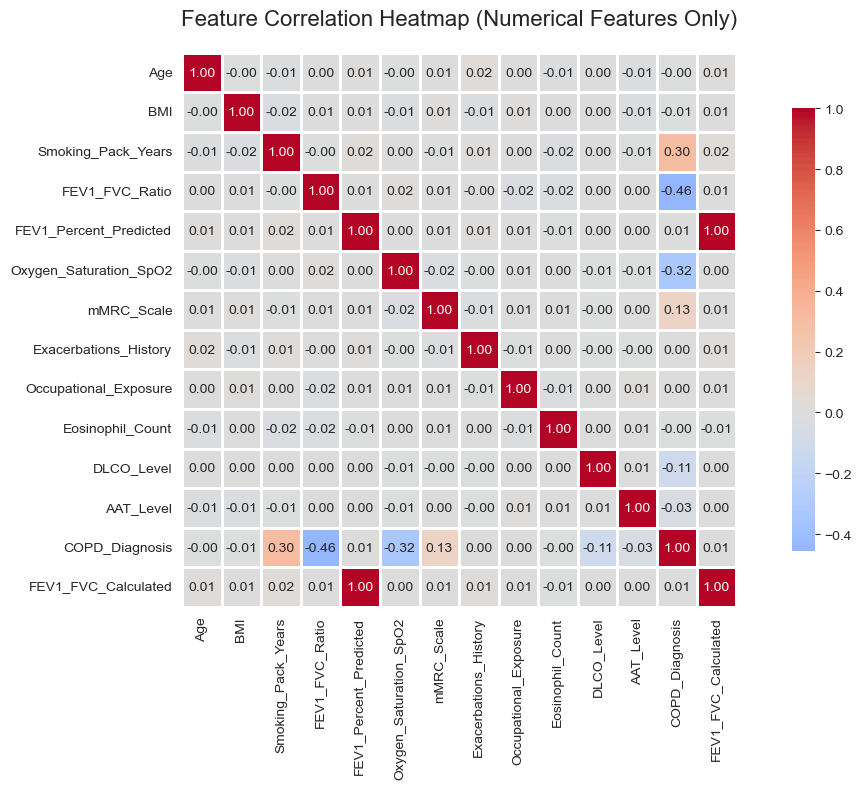


Correlation with target variable (COPD_Diagnosis):
COPD_Diagnosis            1.000000
Smoking_Pack_Years        0.301556
mMRC_Scale                0.131723
FEV1_Percent_Predicted    0.009058
FEV1_FVC_Calculated       0.009058
Occupational_Exposure     0.004776
Exacerbations_History     0.002028
Age                      -0.003174
Eosinophil_Count         -0.004174
BMI                      -0.005312
AAT_Level                -0.033137
DLCO_Level               -0.105955
Oxygen_Saturation_SpO2   -0.323932
FEV1_FVC_Ratio           -0.456946
Name: COPD_Diagnosis, dtype: float64




In [15]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numerical_cols]

plt.figure(figsize=(12, 8))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Heatmap (Numerical Features Only)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\nCorrelation with target variable (COPD_Diagnosis):")
print(correlation_matrix['COPD_Diagnosis'].sort_values(ascending=False))
print("\n" + "="*80 + "\n")

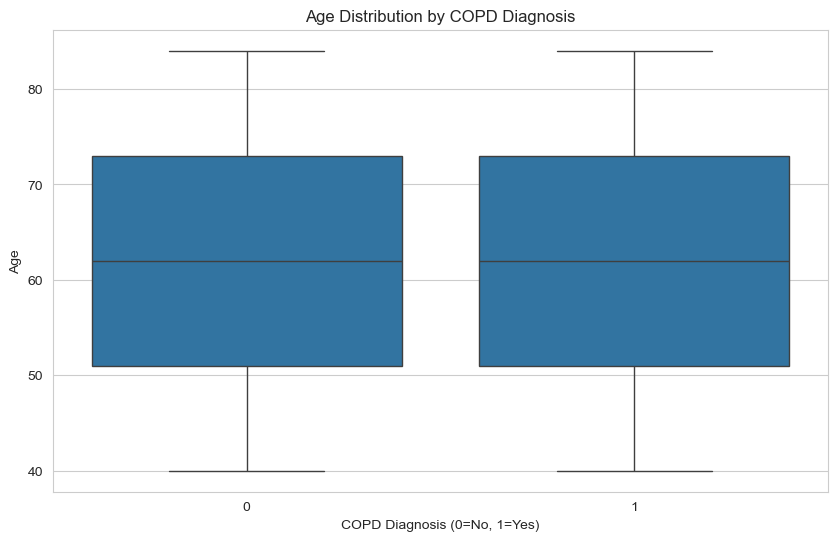

In [16]:
# Age Distribution by COPD Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='COPD_Diagnosis', y='Age', data=df)
plt.title("Age Distribution by COPD Diagnosis")
plt.xlabel("COPD Diagnosis (0=No, 1=Yes)")
plt.ylabel("Age")
plt.show()

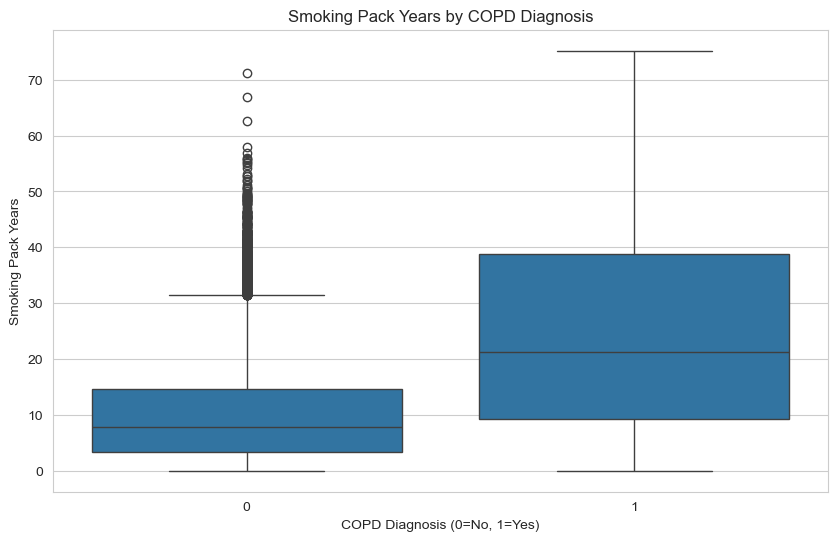

In [17]:
# Smoking Pack Years by COPD Diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='COPD_Diagnosis', y='Smoking_Pack_Years', data=df)
plt.title("Smoking Pack Years by COPD Diagnosis")
plt.xlabel("COPD Diagnosis (0=No, 1=Yes)")
plt.ylabel("Smoking Pack Years")
plt.show()

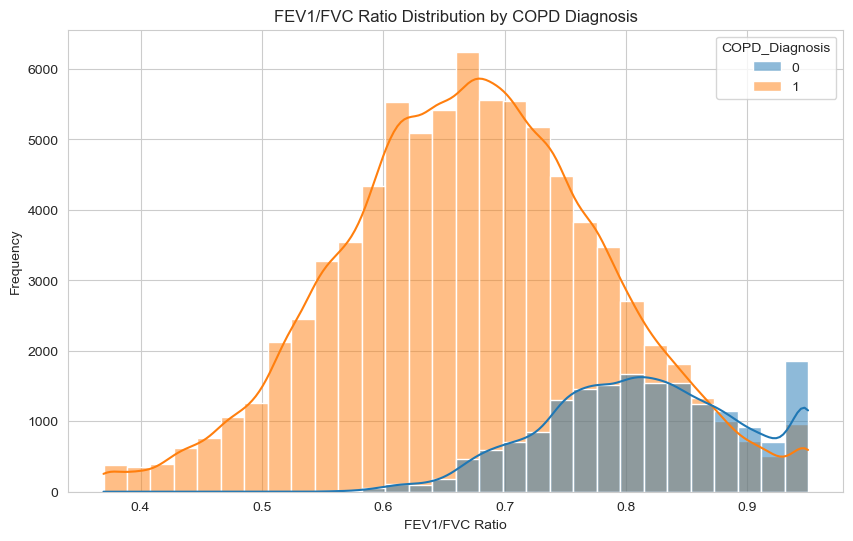

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='FEV1_FVC_Ratio', hue='COPD_Diagnosis', kde=True, bins=30)
plt.title("FEV1/FVC Ratio Distribution by COPD Diagnosis")
plt.xlabel("FEV1/FVC Ratio")
plt.ylabel("Frequency")
plt.show()

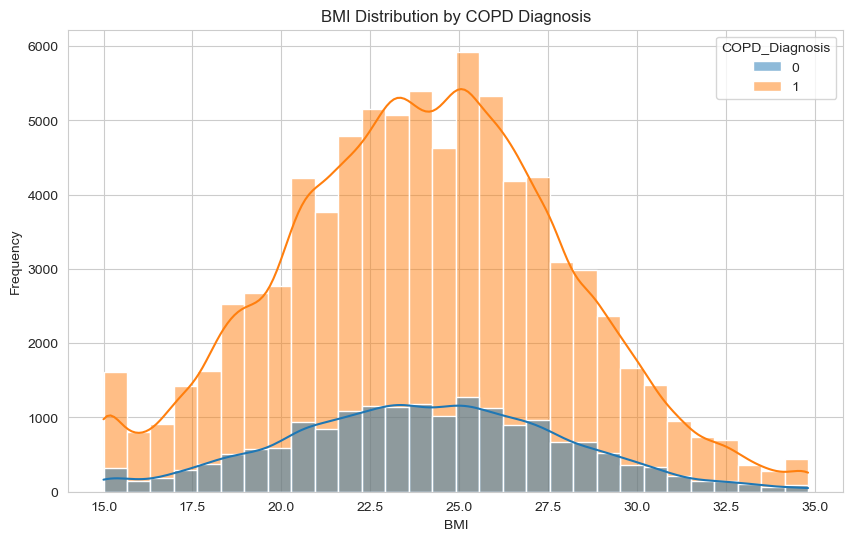

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BMI', hue='COPD_Diagnosis', kde=True, bins=30)
plt.title("BMI Distribution by COPD Diagnosis")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

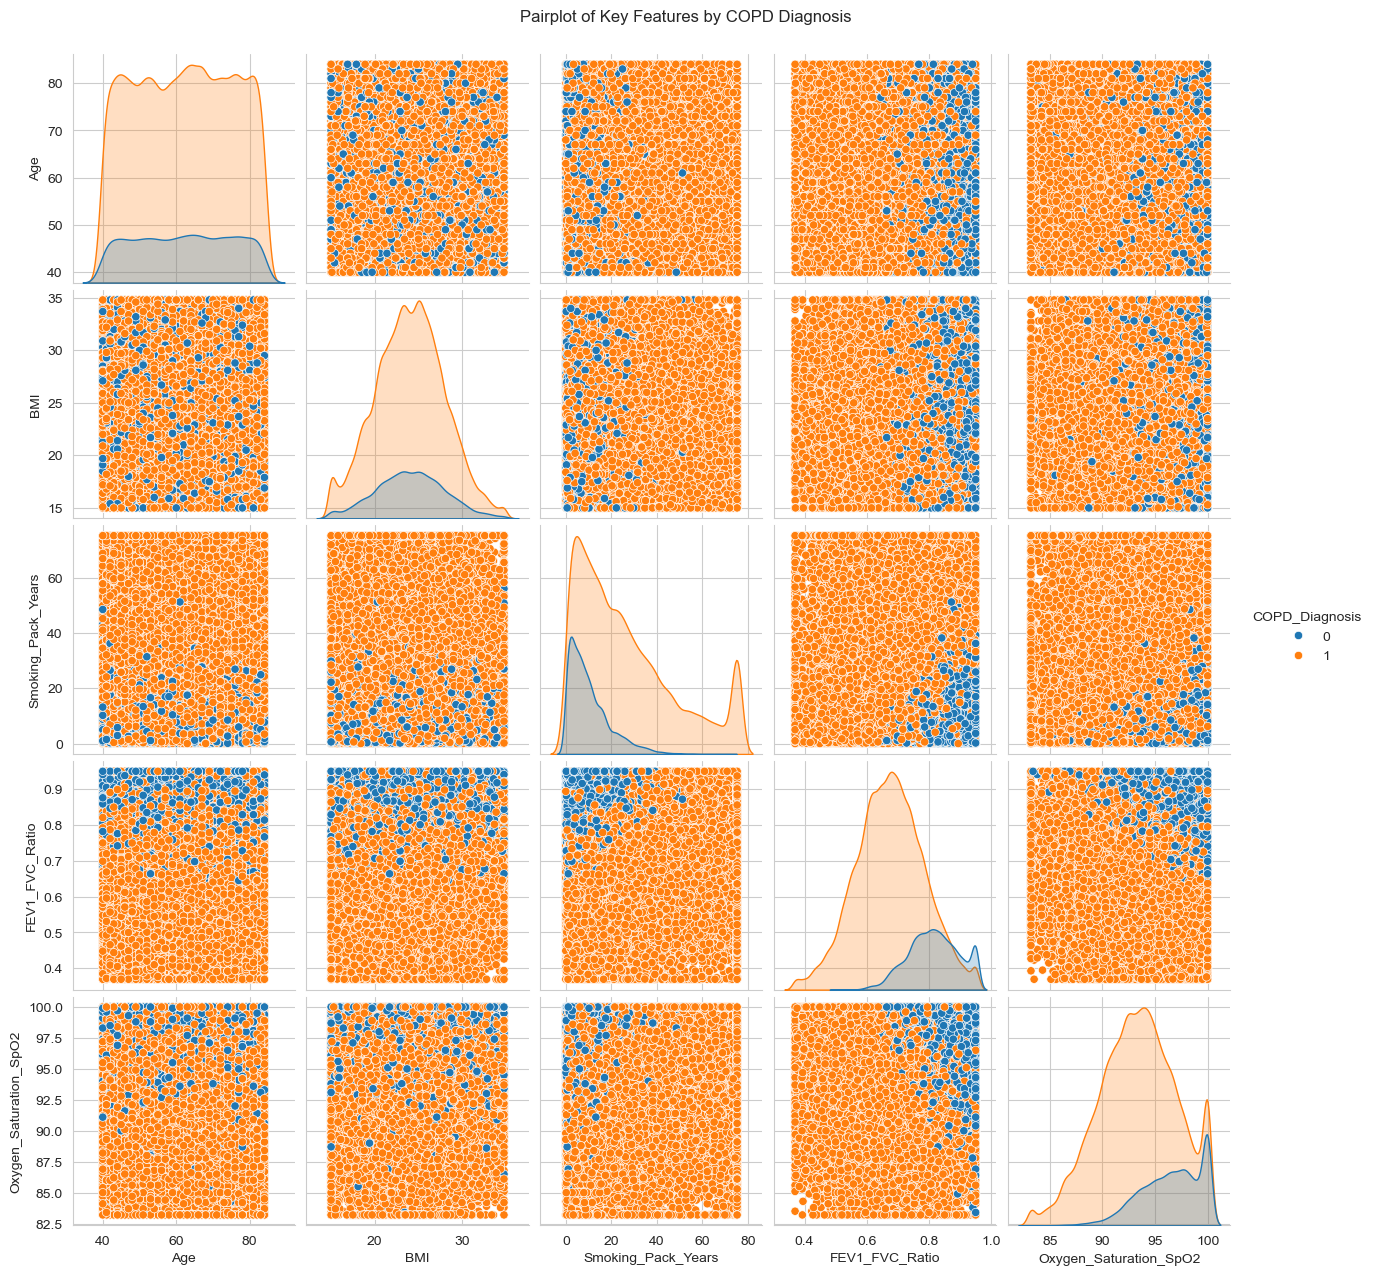

In [20]:
# Pairplot for key features
key_features = ['Age', 'BMI', 'Smoking_Pack_Years', 'FEV1_FVC_Ratio', 'Oxygen_Saturation_SpO2', 'COPD_Diagnosis']
sns.pairplot(df[key_features], hue='COPD_Diagnosis', diag_kind='kde')
plt.suptitle("Pairplot of Key Features by COPD Diagnosis", y=1.02)
plt.show()

print("\n" + "="*80 + "\n")

In [21]:
# Separate features and target
X = df.drop('COPD_Diagnosis', axis=1)
y = df['COPD_Diagnosis']

In [22]:
# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

print(f"Original features shape: {X.shape}")
print(f"Encoded features shape: {X_encoded.shape}")
print(f"Target shape: {y.shape}")
print("\n" + "="*80 + "\n")

Original features shape: (100000, 15)
Encoded features shape: (100000, 19)
Target shape: (100000,)




In [23]:
# Train-test split
print("Splitting data into train and test sets:")
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training target distribution:\\n{y_train.value_counts(normalize=True)}")
print(f"Testing target distribution:\\n{y_test.value_counts(normalize=True)}")
print("\n" + "="*80 + "\n")

Splitting data into train and test sets:
Training set shape: (80000, 19)
Testing set shape: (20000, 19)
Training target distribution:\nCOPD_Diagnosis
1    0.8205
0    0.1795
Name: proportion, dtype: float64
Testing target distribution:\nCOPD_Diagnosis
1    0.8205
0    0.1795
Name: proportion, dtype: float64




In [24]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\n" + "="*80 + "\n")

In [25]:
# Training Random Forest Classifier: 
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

In [27]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Model Accuracy: {accuracy:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("\\nConfusion Matrix:")
print(conf_matrix)
print("\\nClassification Report:")
print(class_report)

Model Accuracy: 0.9747
ROC AUC Score: 0.9971
\nConfusion Matrix:
[[ 3187   403]
 [  104 16306]]
\nClassification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      3590
           1       0.98      0.99      0.98     16410

    accuracy                           0.97     20000
   macro avg       0.97      0.94      0.96     20000
weighted avg       0.97      0.97      0.97     20000



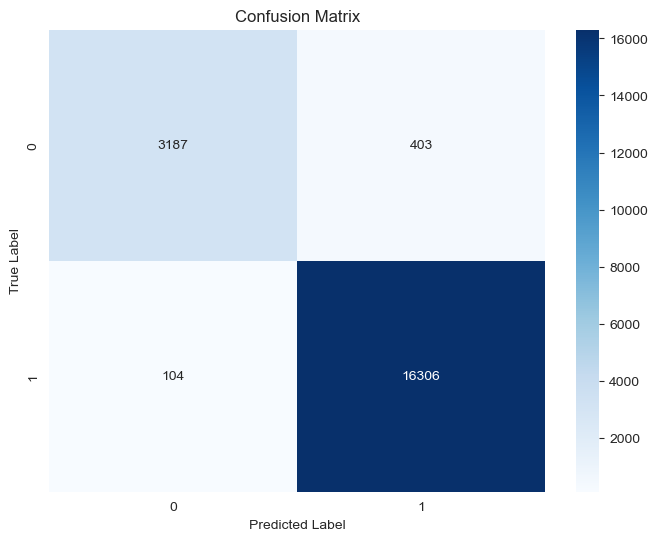

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
print("\n" + "="*80 + "\n")

Feature Importance Analysis:

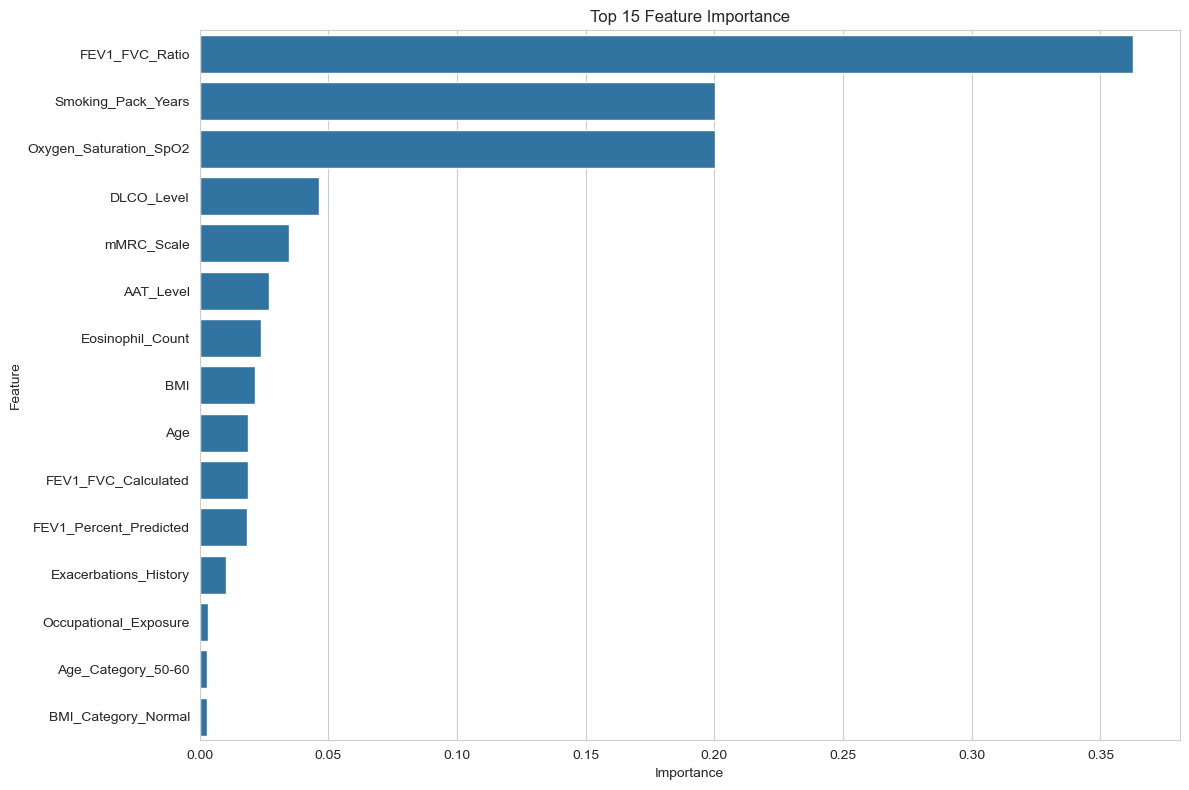

In [29]:
feature_importance = pd.DataFrame({
    'feature': X_encoded.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 15 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [30]:
print("Top 10 most important features:")
print(feature_importance.head(10))
print("\n" + "="*80 + "\n")

Top 10 most important features:
                   feature  importance
3           FEV1_FVC_Ratio    0.362754
2       Smoking_Pack_Years    0.200344
5   Oxygen_Saturation_SpO2    0.200097
10              DLCO_Level    0.046291
6               mMRC_Scale    0.034599
11               AAT_Level    0.026911
9         Eosinophil_Count    0.023989
1                      BMI    0.021544
0                      Age    0.018652
12     FEV1_FVC_Calculated    0.018641




Plotting ROC Curve:


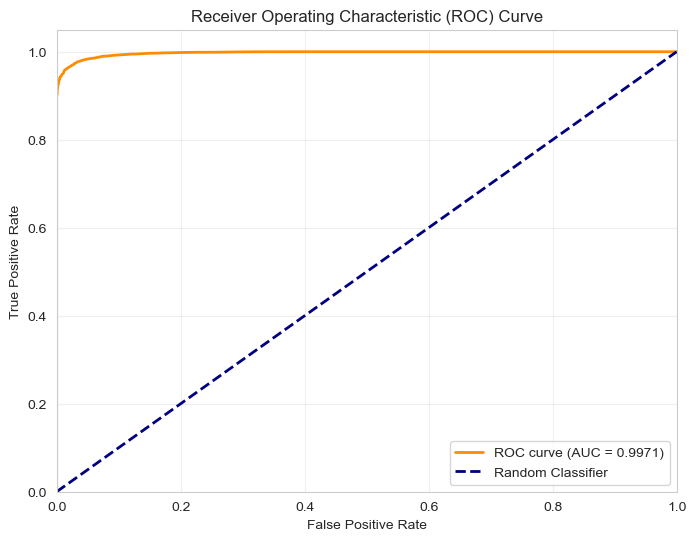

In [31]:
# ROC Curve
print("Plotting ROC Curve:")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()
print("\n" + "="*80 + "\n")

In [34]:
# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print("\n" + "="*80 + "\n")

Cross-validation scores: [0.97425   0.9741875 0.97325   0.9723125 0.9758125]
Mean CV accuracy: 0.9740 (+/- 0.0023)




In [36]:
# Save the model and preprocessing objects
print("Saving model and preprocessing objects:")

model_data = {
    'model': rf_model,
    'scaler': scaler,
    'feature_names': X_encoded.columns.tolist(),
    'accuracy': accuracy,
    'roc_auc': roc_auc
}

with open('copd_model.pkl', 'wb') as f:
    pickle.dump(model_data, f)

print("Model saved as 'copd_model.pkl'")
print("\n" + "="*80 + "\n")

Saving model and preprocessing objects:
Model saved as 'copd_model.pkl'


